<a href="https://colab.research.google.com/github/Akashsindhu/save-neural-models/blob/master/Visualize_Model_Training_History_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* How to inspect the history metrics collected during training.
* How to plot accuracy metrics on training and validation datasets during training.
* How to plot model loss metrics on training and validation datasets during training.


In [0]:
# we will plot the history collected from the model 
# the example collects the history, returned from training the model and creates two charts:
# 1. A plot of accuracy on the training and validation data over training epochs 
# 2. A plot of loss on the training and validation data over training epochs. 


In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import io

seed = 7
np.random.seed(seed)

from google.colab import files 
uploaded = files.upload()

data = io.BytesIO(uploaded["diabetes.csv"])
df = pd.read_csv(data)
df.head()

Saving diabetes.csv to diabetes (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
x = df.iloc[:,0:8]
y= df.iloc[:,-1]

model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x, y, validation_split=.33, epochs=150, batch_size=10, verbose=0)
print(history.history.keys())

W0620 19:00:22.699770 139726751291264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


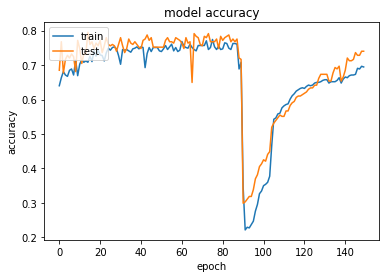

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

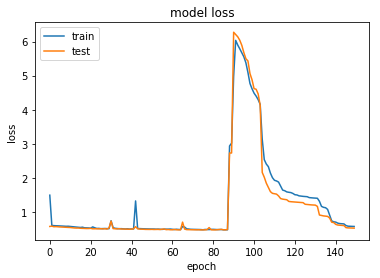

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("model loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()